In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [16]:
data=pd.read_csv("data_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
data["Cabin"] = data.Cabin.astype("category").cat.codes
data["Embarked"] = data.Embarked.astype("category").cat.codes
data["Sex"] = data.Sex.astype("category").cat.codes
data["Survived"] = data.Survived.astype("category")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int8    
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    int16   
 11  Embarked     891 non-null    int8    
dtypes: category(1), float64(2), int16(1), int64(4), int8(2), object(2)
memory usage: 60.3+ KB


In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [21]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [22]:
data.isnull().sum().sum()

0

In [23]:
from sklearn.model_selection import train_test_split
SEED=15
x = data.drop(["Name","Ticket","Survived","PassengerId"],axis=1)
y = data["Survived"].cat.codes

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=SEED)

In [24]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


model = tree.DecisionTreeClassifier(random_state=SEED)

model.fit(x_train, y_train)   
y_pred=model.predict(x_test)   

print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7541899441340782


TypeError: can only concatenate str (not "numpy.int64") to str

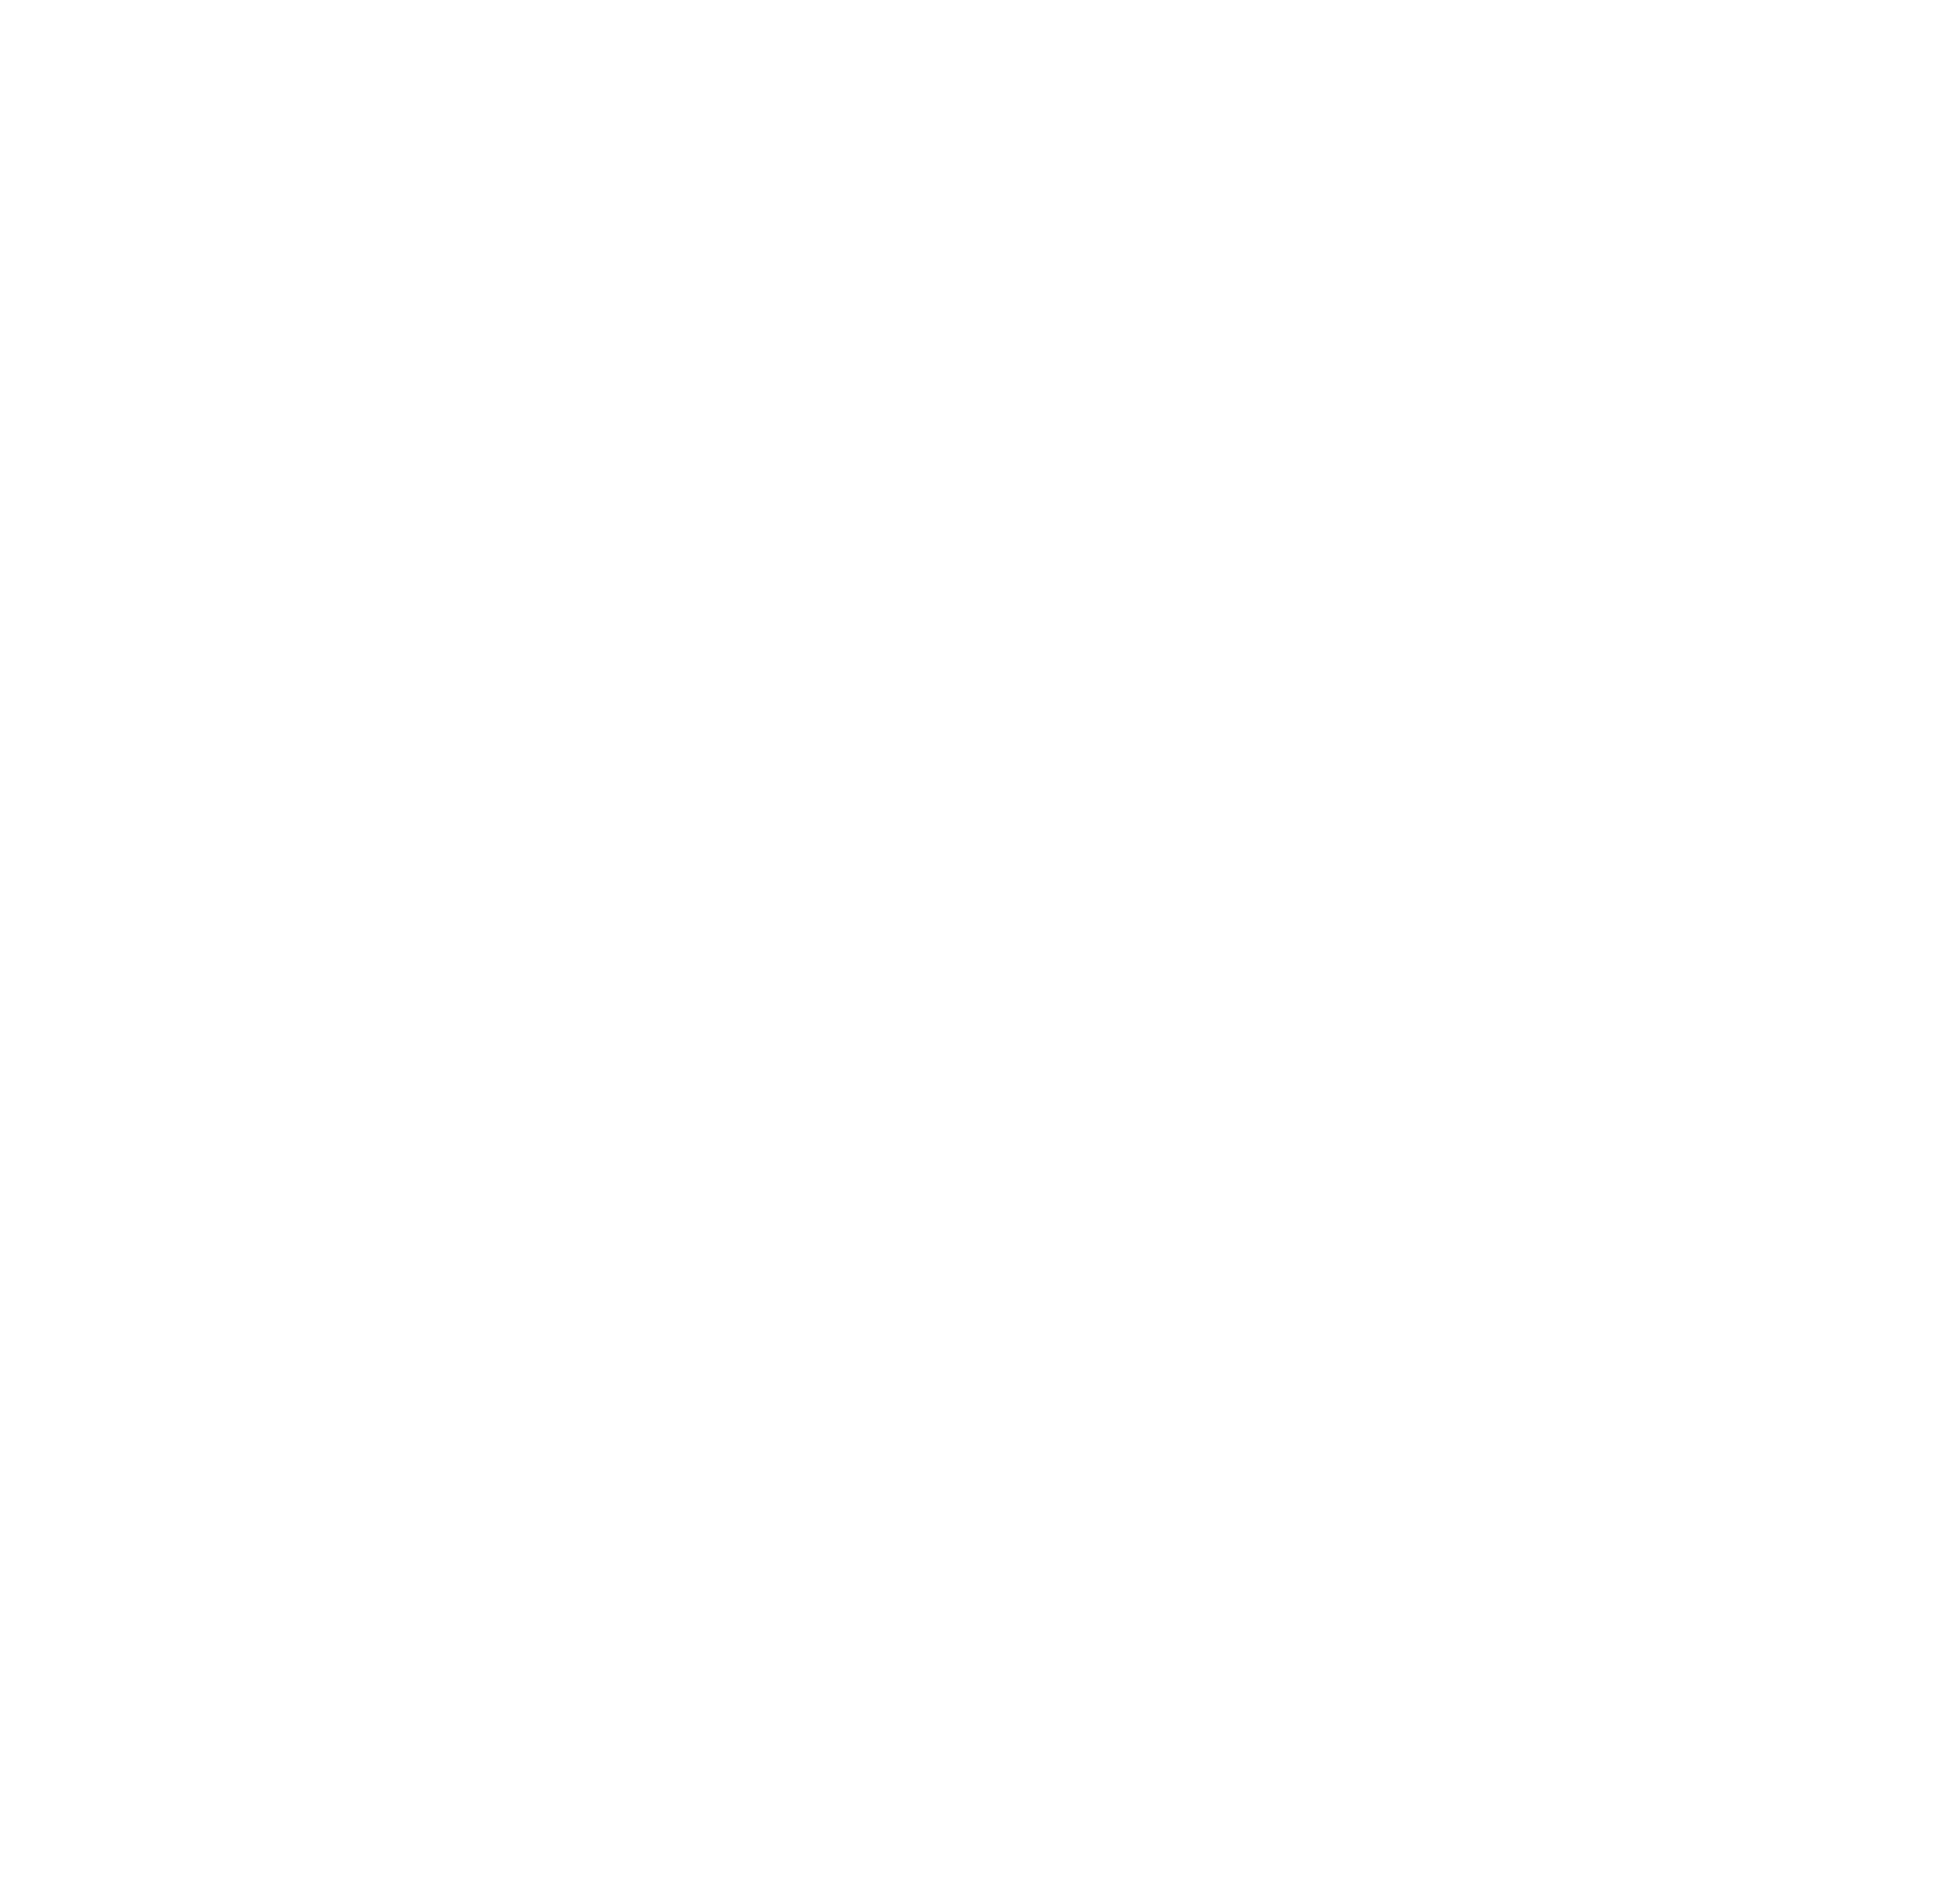

In [25]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model, 
                   feature_names=x.columns.values.tolist(),  
                   class_names=data.Survived.unique(),
                   filled=True)
fig.savefig("tree.png")

In [ ]:
model1 = tree.DecisionTreeClassifier(min_impurity_split=0.2,max_depth=4,random_state=SEED)  
model1.fit(x_train, y_train)   
y_pred=model1.predict(x_test)

print("score:{}".format(accuracy_score(y_test, y_pred)))


In [ ]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model1,
                   feature_names=x.columns.values.tolist(),  
                   class_names=data.Survived.unique(),
                   filled=True)
fig.savefig("tree1.png")